In [1]:
import os, time, warnings
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd

In [3]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [5]:
#audio_files = glob('K:\Proyecto T\Screams\*.wav')
audio_files = glob('K:/Proyecto T/vs_release_16k/audio_16k/*.wav')

audio_files

['K:/Proyecto T/vs_release_16k/audio_16k\\f0003_0_cough.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0003_0_laughter.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0003_0_sigh.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0003_0_sneeze.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0003_0_sniff.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0003_0_throatclearing.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0004_0_cough.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0004_0_laughter.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0004_0_sigh.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0004_0_sneeze.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0004_0_sniff.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0004_0_throatclearing.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0007_0_cough.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0007_0_laughter.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0007_0_sigh.wav',
 'K:/Proyecto T/vs_release_16k/audio_16k\\f0

In [6]:
ipd.Audio(audio_files[1])

In [7]:
y, sr = librosa.load(audio_files[1])
print('y: ', y[:10])
print('y.shape: ', y.shape)
print('sr: ', sr)

y:  [-8.2753965e-04  1.0295637e-03  3.8079701e-03  5.1458459e-03
  6.2605068e-03  6.7801359e-03  4.3042204e-03  1.2590403e-03
  2.9074785e-05 -2.5979830e-03]
y.shape:  (100353,)
sr:  22050


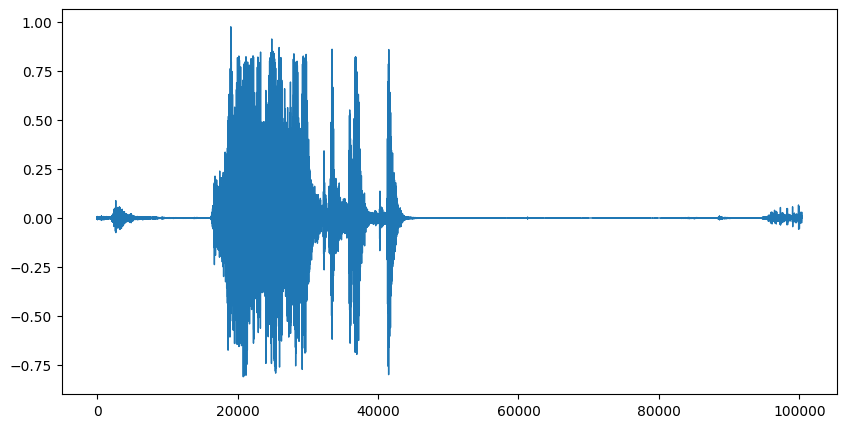

In [8]:
pd.Series(y).plot(figsize=(10,5), lw=1)
plt.show()

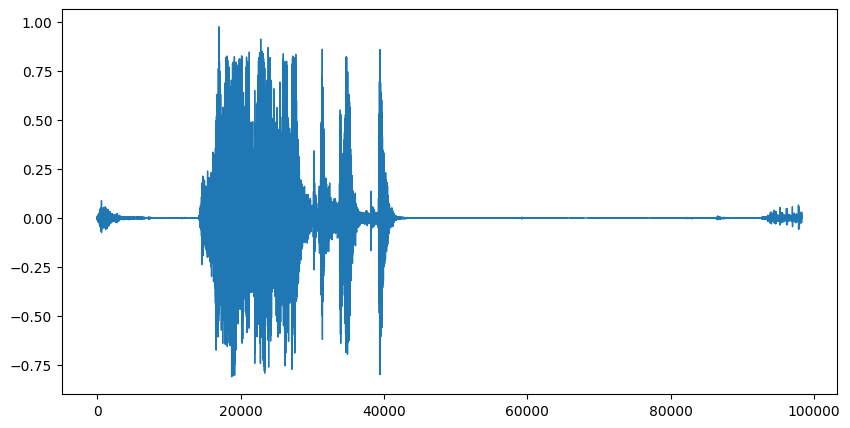

In [9]:
y_trimmed, _ = librosa.effects.trim(y, top_db=30)

pd.Series(y_trimmed).plot(figsize=(10,5), lw=1)
plt.show()

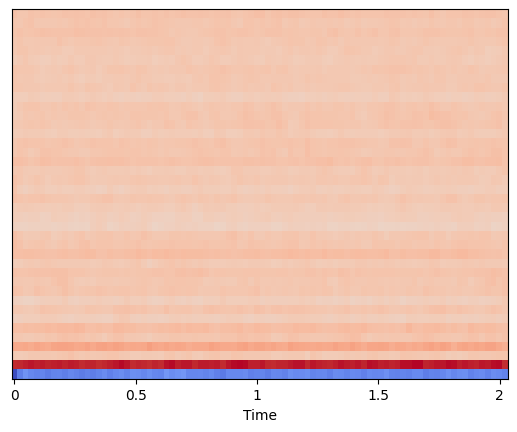

In [10]:
audio_dataset_path_g = 'K:/Proyecto T/UrbanSound8K/audio/'
audio_path = audio_dataset_path_g + "fold1/127873-0-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")

In [4]:
# reading the files
audio_dataset_path = "K:/Proyecto T/DatasetEditOK/audio/"

# loading the csv
meta_data = pd.read_csv("K:/Proyecto T/DatasetEditOK/audio/DatasetEditExel.csv")
meta_data["class"] = meta_data["class"].replace(to_replace="air_conditioner", value="Aire Acondicionado")
meta_data["class"] = meta_data["class"].replace(to_replace="car_horn", value="Bosina")
meta_data["class"] = meta_data["class"].replace(to_replace="children_playing", value="Niños Jugando")
meta_data["class"] = meta_data["class"].replace(to_replace="dog_bark", value="Ladrido")
meta_data["class"] = meta_data["class"].replace(to_replace="drilling", value="Taladrando")
meta_data["class"] = meta_data["class"].replace(to_replace="engine_idling", value="Motor")
meta_data["class"] = meta_data["class"].replace(to_replace="gun_shot", value="Disparos")
meta_data["class"] = meta_data["class"].replace(to_replace="jackhammer", value="Martillo perforador")
meta_data["class"] = meta_data["class"].replace(to_replace="siren", value="Sirena")
meta_data["class"] = meta_data["class"].replace(to_replace="coughing", value="Toser")
meta_data["class"] = meta_data["class"].replace(to_replace="crying", value="Llorar")
meta_data["class"] = meta_data["class"].replace(to_replace="laughing", value="Reir")
meta_data["class"] = meta_data["class"].replace(to_replace="lip-popping", value="Chasquido de labios")
meta_data["class"] = meta_data["class"].replace(to_replace="moaning", value="Gemido")
meta_data["class"] = meta_data["class"].replace(to_replace="nose-blowing", value="Sonarse la nariz")
meta_data["class"] = meta_data["class"].replace(to_replace="panting", value="Jadeo")
meta_data["class"] = meta_data["class"].replace(to_replace="screaming", value="Grito")
meta_data["class"] = meta_data["class"].replace(to_replace="sighing", value="Suspirando")
meta_data["class"] = meta_data["class"].replace(to_replace="sneezing", value="Estornudo")
meta_data["class"] = meta_data["class"].replace(to_replace="teeth-chattering", value="Castañeo de dientes")
meta_data["class"] = meta_data["class"].replace(to_replace="teeth-grinding", value="Rechinar los dientes")
meta_data["class"] = meta_data["class"].replace(to_replace="lip-smacking", value="Comiendo a boca abierta")
meta_data["class"] = meta_data["class"].replace(to_replace="throat-clearing", value="Carraspeo")
meta_data["class"] = meta_data["class"].replace(to_replace="yawning", value="Bostezo")
meta_data["class"] = meta_data["class"].replace(to_replace="tongue-clicking", value="Chasquido de lengua")
meta_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1.0,5,3,Ladrido
1,100263-2-0-117.wav,100263,58.5,62.5,1.0,5,2,Niños Jugando
2,100263-2-0-121.wav,100263,60.5,64.5,1.0,5,2,Niños Jugando
3,100263-2-0-126.wav,100263,63.0,67.0,1.0,5,2,Niños Jugando
4,100263-2-0-137.wav,100263,68.5,72.5,1.0,5,2,Niños Jugando


In [5]:
len(meta_data)

11055

In [6]:
meta_data.groupby("classID")["class"].unique()

classID
0          [Aire Acondicionado]
1                      [Bosina]
2               [Niños Jugando]
3                     [Ladrido]
4                  [Taladrando]
5                       [Motor]
6                    [Disparos]
7         [Martillo perforador]
8                      [Sirena]
9                [street_music]
10                      [Toser]
11                     [Llorar]
12                       [Reir]
13        [Chasquido de labios]
14    [Comiendo a boca abierta]
15                     [Gemido]
16           [Sonarse la nariz]
17                      [Jadeo]
18                      [Grito]
19                 [Suspirando]
20                  [Estornudo]
21        [Castañeo de dientes]
22       [Rechinar los dientes]
23                  [Carraspeo]
24        [Chasquido de lengua]
25                    [Bostezo]
Name: class, dtype: object

# **Extracion de caracteristicas MFCC y contruccion de Base de Datos**

In [7]:
# lista con las todas las caracteristicas
extracted = []
errors = []

# por cada fila en el archivo csv
for index_num, row in tqdm(meta_data.iterrows()):
    # obtiene el archivo
    file_name = os.path.join(
        os.path.abspath(audio_dataset_path),
        "fold" + str(row["fold"]) + "/",
        str(row["slice_file_name"]),
    )
    try:
        # obtiene la clase del archivo
        final_class_labels = row["class"]
        # load the audio file
        audio, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
        # estrae las caracteristicas
        feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
        # escalado
        scaled_feature = np.mean(feature.T, axis=0)
        # guardado en la lista
        extracted.append([scaled_feature, final_class_labels])
    except:
        errors.append(file_name)

errortxt = open(audio_dataset_path+"/errors.txt", "w")
errortxt.truncate(0)

print("Errores en los siguientes YTIDs: ", errors)
for string in errors:
    errortxt.write(string + "\n")
    
errortxt.close()

11055it [10:32, 17.49it/s]

Errores en los siguientes YTIDs:  ['K:\\Proyecto T\\DatasetEditOK\\audio\\fold11/f0066_0_cough.wav', 'K:\\Proyecto T\\DatasetEditOK\\audio\\fold11/scream.wav', 'K:\\Proyecto T\\DatasetEditOK\\audio\\fold11/f0098_0_sneeze.wav']


In [8]:
# create a new dataframe
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_df.pkl")
extracted_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",Ladrido
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",Niños Jugando
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",Niños Jugando
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",Niños Jugando
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",Niños Jugando


# **Data Preprocessing**


## Distribucion de la data entre X e Y

In [4]:
final = pd.read_pickle("extracted_df.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())


## Uso de LabelEncoder() para codificar la etiquetas a un int

In [5]:
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

## Prueba separacion de la data entre data de train y test

In [9]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  8841
Number of testing samples =  2211


# **Model CNN**

## Procesamiento de las muestras de entrenamiento y evaluacion

In [18]:
xTrainval, xTest, yTrainval, yTest = train_test_split(
    X, Y, test_size=0.1, stratify=y, random_state=387
)
xTrain, xvalid, yTrain, yvalid = train_test_split(
    xTrainval, yTrainval, test_size=0.2, stratify=yTrainval, random_state=387
)
print("\nNumber of samples for Train set :", xTrain.shape[0])
print("Number of samples for Validation set :", xvalid.shape[0])
print("Number of samples for Test set :", xTest.shape[0])

xTrain = np.expand_dims(xTrain, axis=2)
xvalid = np.expand_dims(xvalid, axis=2)

print("Shape of X Train", xTrain.shape)
print("Shape of X Test", xTest.shape)



Number of samples for Train set : 7956
Number of samples for Validation set : 1990
Number of samples for Test set : 1106
Shape of X Train (7956, 128, 1)
Shape of X Test (1106, 128)


In [13]:
"""
xTrain, xTest, yTrain, yTest = train_test_split(
    X, Y, test_size=0.1, stratify=y, random_state=387
)

print("\nNumber of samples for Train set :", xTrain.shape[0])
print("Number of samples for Test set :", xTest.shape[0])

xTrain = np.expand_dims(xTrain, axis=2)

print("Shape of X Train", xTrain.shape)
print("Shape of X Test", xTest.shape)
"""


Number of samples for Train set : 9946
Number of samples for Test set : 1106
Shape of X Train (9946, 128, 1)
Shape of X Test (1106, 128)


In [19]:
xtrain = xTrain.reshape(xTrain.shape[0], 16, 8, 1)
xtest = xTest.reshape(xTest.shape[0], 16, 8, 1)

print("The Shape of X Train", xtrain.shape)
print("The Shape of Y Train", yTrain.shape)
print("The Shape of X Test", xtest.shape)
print("The Shape of Y Test", yTest.shape)


The Shape of X Train (7956, 16, 8, 1)
The Shape of Y Train (7956, 26)
The Shape of X Test (1106, 16, 8, 1)
The Shape of Y Test (1106, 26)


## Definicion de la estructura del modelo

In [27]:

model = Sequential()
model.add(
    Conv2D(64, (3, 3), padding="same", activation="tanh", input_shape=(16, 8, 1))
)
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(1024, activation="tanh"))
model.add(Dense(26, activation="softmax"))
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d_2 (Conv2D)           (None, 16, 8, 64)         640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 4, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 4, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 2, 128)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 2, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
          

In [4]:
"""
model = Sequential()
model.add(
    Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(16, 8, 1))
)
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(26, activation="softmax"))
model.summary()
"""


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 4, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 2, 128)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 4, 2, 128)         0         
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Compilacion del modelo

In [28]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

## Entrenamiento del modelo


In [29]:
t0 = time.time()

CNN2D_Results = model.fit(
    xtrain, yTrain, epochs=60, batch_size=50, validation_data=(xtest, yTest)
)

model.save("Model.h5")
print("Model Saved")
train_hist_m3 = pd.DataFrame(CNN2D_Results.history)
train_m3 = round(time.time() - t0, 3)

Epoch 1/60


160/160 [==============================] - 4s 18ms/step - loss: 1.4963 - accuracy: 0.5300 - val_loss: 1.0894 - val_accuracy: 0.6483
Epoch 2/60
160/160 [==============================] - 3s 17ms/step - loss: 0.8849 - accuracy: 0.7115 - val_loss: 0.8594 - val_accuracy: 0.7315
Epoch 3/60
160/160 [==============================] - 3s 17ms/step - loss: 0.6662 - accuracy: 0.7854 - val_loss: 0.8826 - val_accuracy: 0.7197
Epoch 4/60
160/160 [==============================] - 3s 17ms/step - loss: 0.5498 - accuracy: 0.8209 - val_loss: 0.7536 - val_accuracy: 0.7722
Epoch 5/60
160/160 [==============================] - 3s 17ms/step - loss: 0.4639 - accuracy: 0.8449 - val_loss: 0.8144 - val_accuracy: 0.7631
Epoch 6/60
160/160 [==============================] - 3s 18ms/step - loss: 0.3844 - accuracy: 0.8676 - val_loss: 0.8027 - val_accuracy: 0.7722
Epoch 7/60
160/160 [==============================] - 3s 19ms/step - loss: 0.3180 - accuracy: 0.8937 - val_loss: 0.7453 - val_accuracy: 0.7776
Epoch 8/60

## Resultados

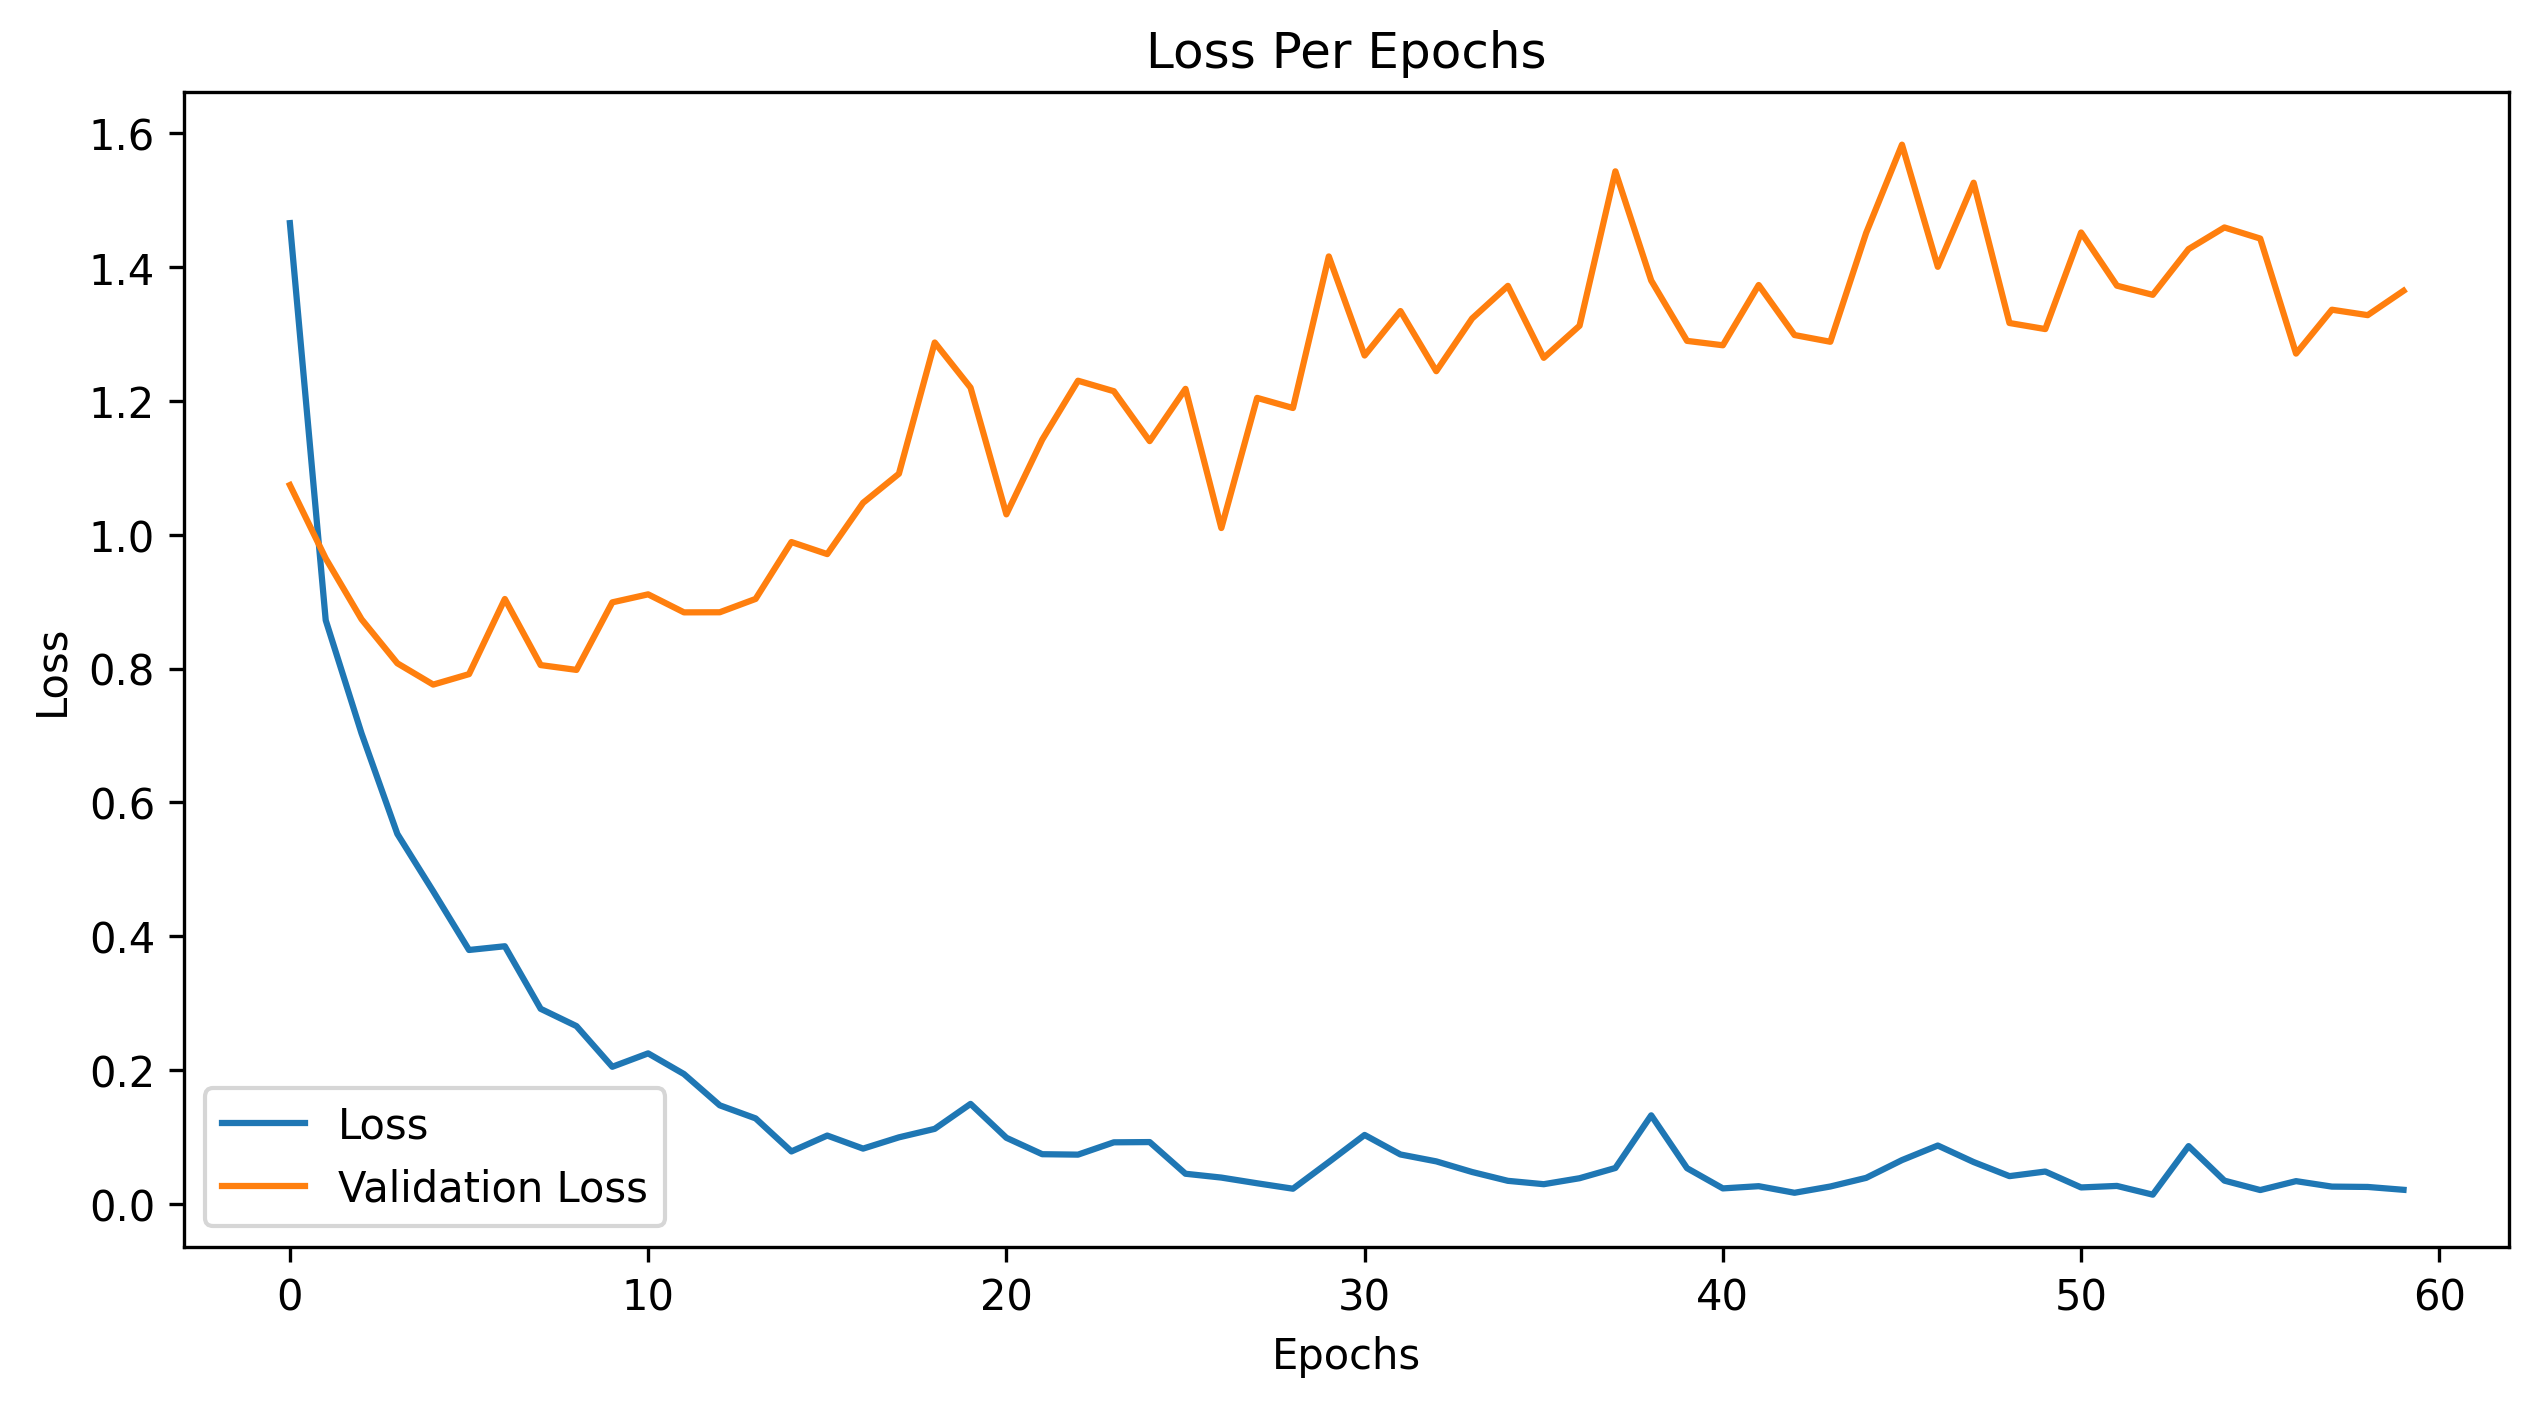

In [18]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

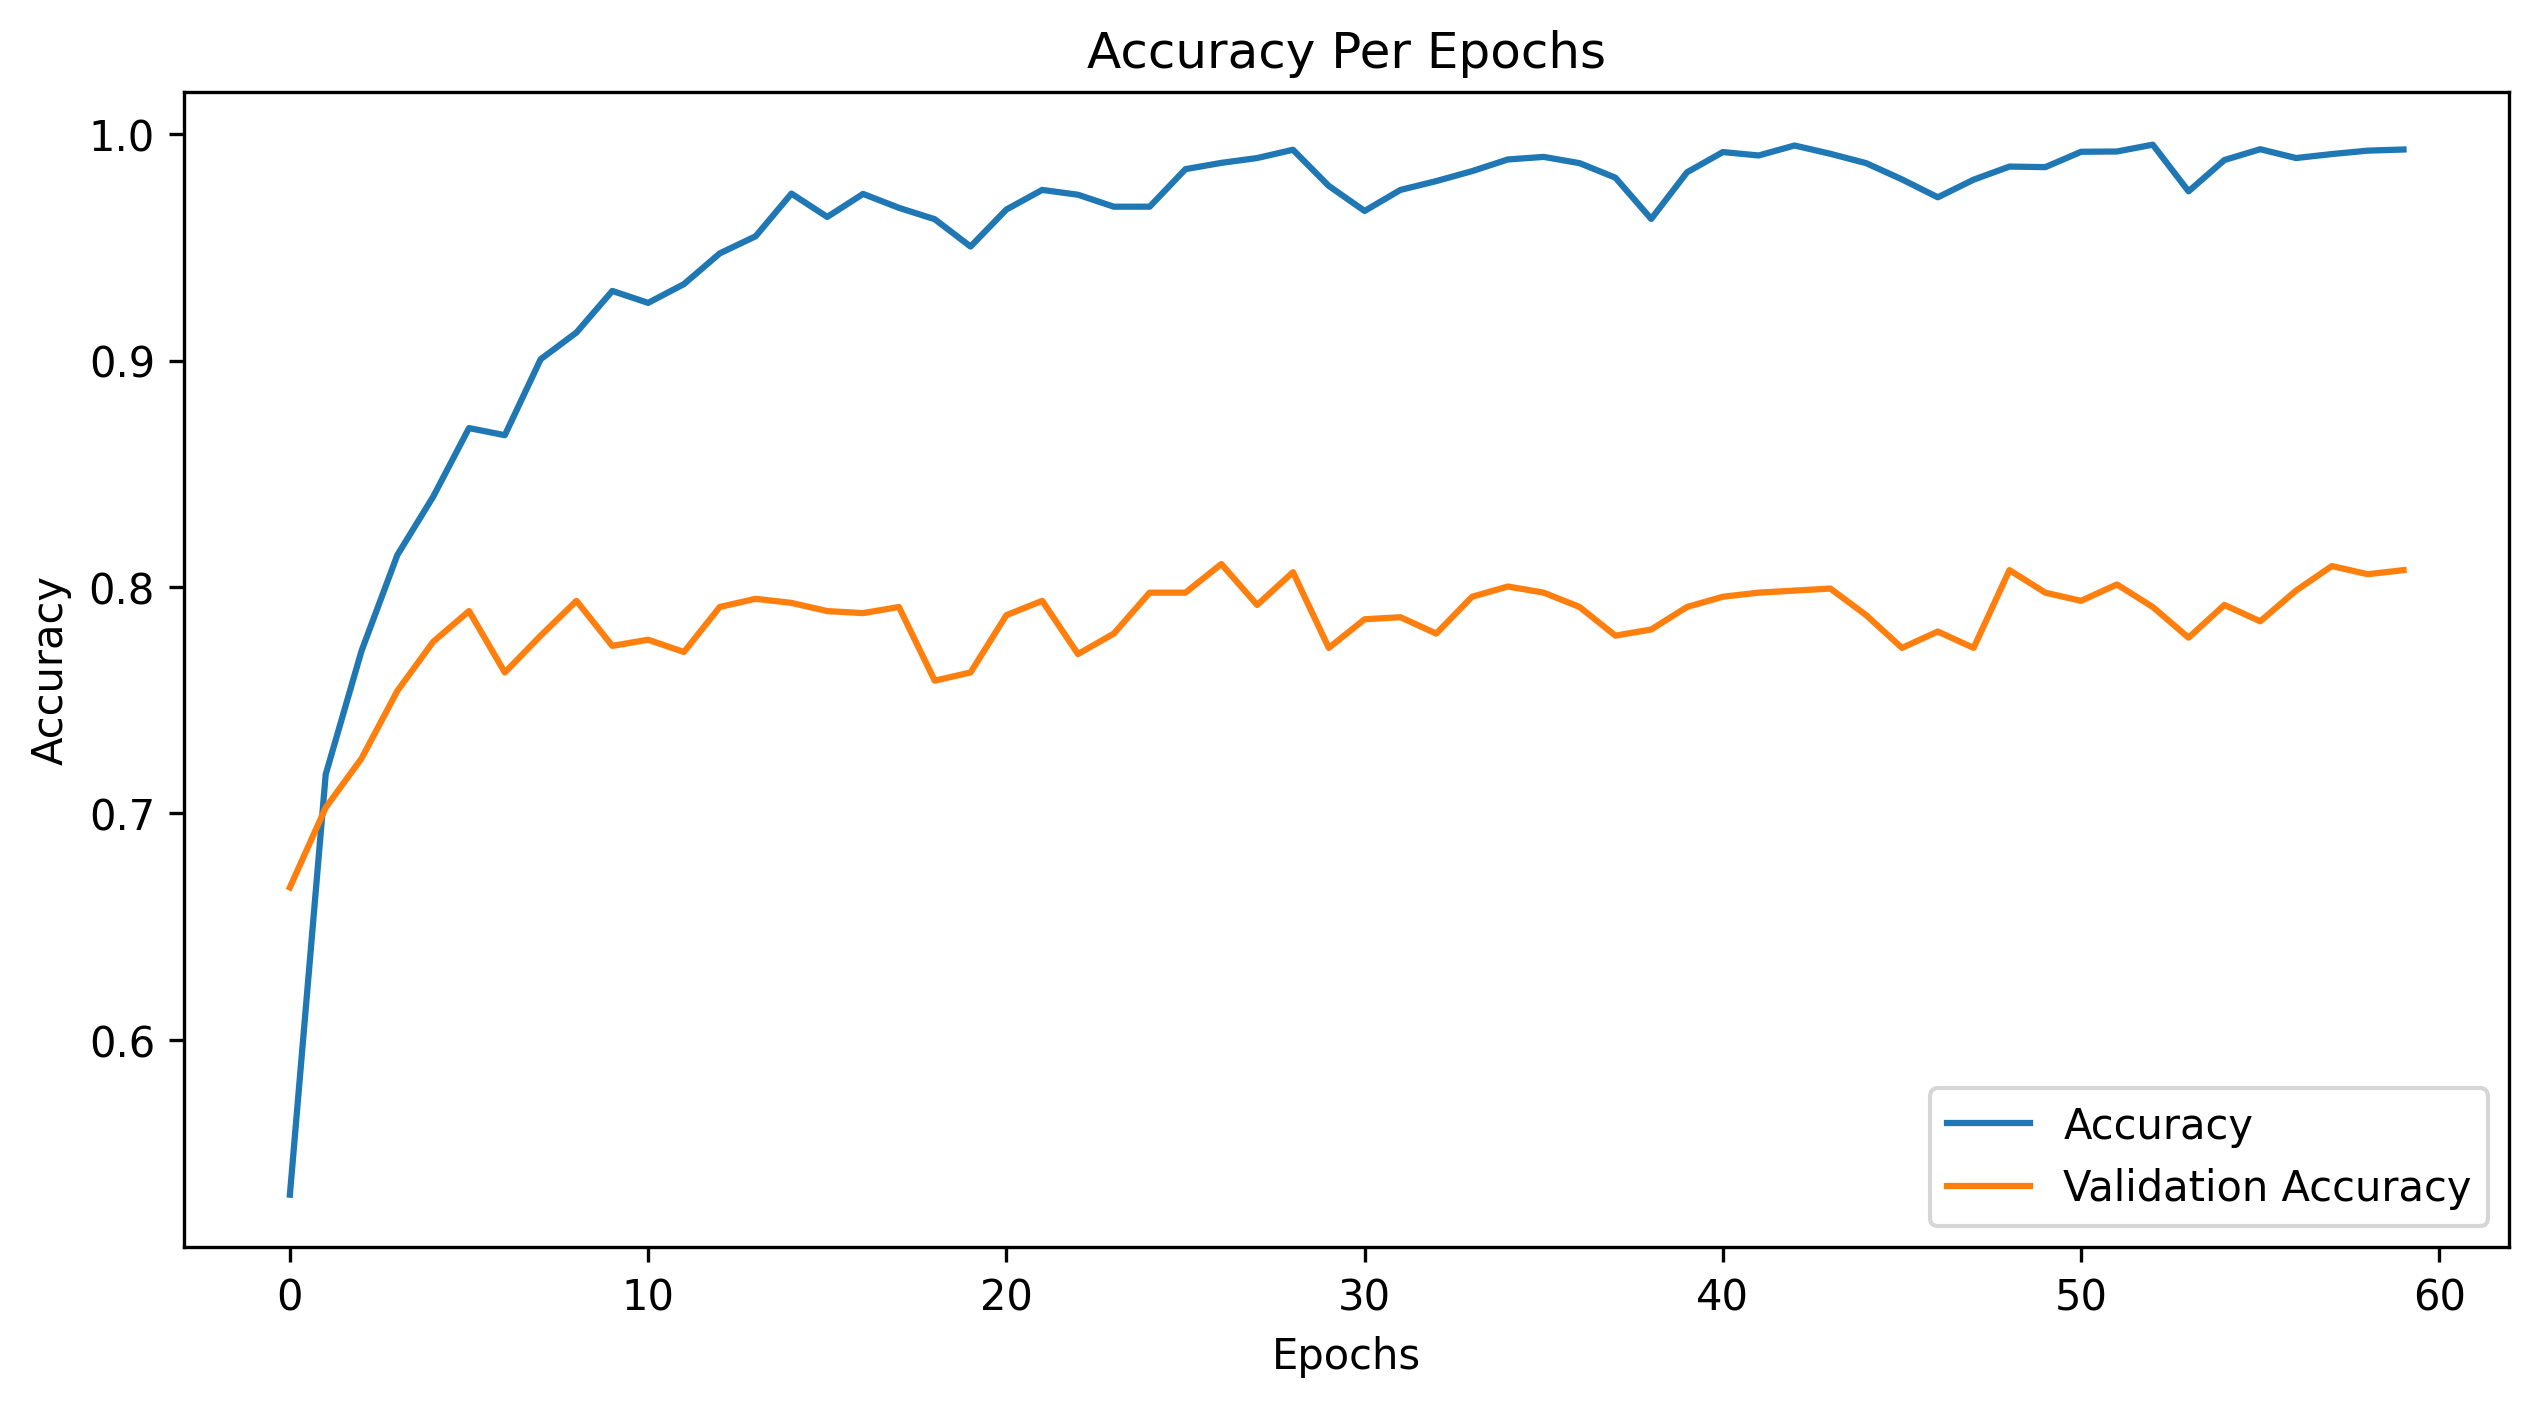

In [19]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## Funcion de prediccion del modelo


In [4]:
#Carga del modelo ya creado en caso de ya existir

from tensorflow.keras.models import load_model

model = load_model('Model.h5')

final = pd.read_pickle("extracted_df.pkl")
y = np.array(final["class"].tolist())
le = LabelEncoder()
to_categorical(le.fit_transform(y))


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [5]:
# funcion de prediccion
def model_Prediction(file_name):
    # carga el erchivo
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # obtiene las caracteristicas MFCC
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # escalado
    feature_scaled = np.mean(feature.T, axis=0)
    # lista las caracteristicas
    prediction_feature = np.array([feature_scaled])
    # redimenciona
    final_prediction_feature = prediction_feature.reshape(
        prediction_feature.shape[0], 16, 8, 1
    )
    # obtiene la id de la clase usando argmax
    predicted_vector = np.argmax(model.predict(final_prediction_feature), axis=-1)
    #obtiene la categoria de la clase desde la id
    predicted_class = le.inverse_transform(predicted_vector)
    # resultado
    print("El modelo a predicho la clase como  --> ", predicted_class[0])

## Prueba del modelo en un audio unitario

In [9]:
audio_dataset_path = "K:/Proyecto T/DatasetEditOK/audio/"
fold = "fold11/"
file_name = audio_dataset_path + fold + "f0190_0_throatclearing.wav"
model_Prediction(file_name)
ipd.Audio(file_name)

1/1 [==============================] - 0s 17ms/step
El modelo a predicho la clase como  -->  Carraspeo
